Machine learning assignment
===================
Covid-19 Outbreak Prediction

Dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

Objective:
-to predict the spread of corona virus across the region for China, US and Malaysia
-to analyses the growth rates and types of mitigation applied based on China, US and Malaysia


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
from sklearn.impute import SimpleImputer
sns.set()
%matplotlib inline
pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()


Data cleaning
===========

In this part of notebook, I take csv files covid_19_data

Clean data from covid_19_data.csv file and only select region for China, US and Malaysia

In [3]:
covid = pd.read_csv('covid_19_data.csv')

In [4]:
#see data 
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
# data information
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              172480 non-null  int64  
 1   ObservationDate  172480 non-null  object 
 2   Province/State   124597 non-null  object 
 3   Country/Region   172480 non-null  object 
 4   Last Update      172480 non-null  object 
 5   Confirmed        172480 non-null  float64
 6   Deaths           172480 non-null  float64
 7   Recovered        172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [6]:
# check if there exist a missing value
mis = covid.isnull().sum()
mis[mis>0]

Province/State    47883
dtype: int64

In [8]:
#Only Province/State have a missing value. I can impute it because this variable is necessary for visualizing a data.

imputer = SimpleImputer(strategy='constant')#here I use constant because I cannot put another Province/State
#that we do not know or that does not correspond to his country/region  
impute_covid = pd.DataFrame(imputer.fit_transform(covid), columns=covid.columns)
impute_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [9]:
#convert ObservationDate and Last Update object to datetime
#convert confirmed, recovered, death to numeric
impute_covid['ObservationDate'] = pd.to_datetime(impute_covid['ObservationDate'])
impute_covid['Last Update'] = pd.to_datetime(impute_covid['Last Update'])
impute_covid['Confirmed'] = pd.to_numeric(impute_covid['Confirmed'], errors='coerce')
impute_covid['Recovered'] = pd.to_numeric(impute_covid['Recovered'], errors='coerce')
impute_covid['Deaths'] = pd.to_numeric(impute_covid['Deaths'], errors='coerce')


In [10]:
#check
#impute_covid.to_csv('covid_19_data_clean.csv', index=False)
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              172480 non-null  object        
 1   ObservationDate  172480 non-null  datetime64[ns]
 2   Province/State   172480 non-null  object        
 3   Country/Region   172480 non-null  object        
 4   Last Update      172480 non-null  datetime64[ns]
 5   Confirmed        172480 non-null  float64       
 6   Deaths           172480 non-null  float64       
 7   Recovered        172480 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 10.5+ MB


we are finishing data cleaning

Feature Statistics and Visualization
impute_covid: we are going to visualize this data and make some statistics to find the relevant information.

In [11]:
# see again data table
impute_covid.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


In [12]:
# we compute the active_confirmed
impute_covid['active_confirmed'] = impute_covid['Confirmed'].values - \
(impute_covid['Deaths'].values+impute_covid['Recovered'].values)

In [13]:
#check if all is ok
impute_covid.isnull().sum()[impute_covid.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
#ok we have no problem see table data
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SNo               172480 non-null  object        
 1   ObservationDate   172480 non-null  datetime64[ns]
 2   Province/State    172480 non-null  object        
 3   Country/Region    172480 non-null  object        
 4   Last Update       172480 non-null  datetime64[ns]
 5   Confirmed         172480 non-null  float64       
 6   Deaths            172480 non-null  float64       
 7   Recovered         172480 non-null  float64       
 8   active_confirmed  172480 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 11.8+ MB


China
=====

In [17]:
china = impute_covid[impute_covid['Country/Region'] == 'Mainland China']
chstar_date = china.ObservationDate.min()
chend_date = china.ObservationDate.max()
print('Novel covid-19 China:\n start date = {}\n end date = {}'.format(chstar_date, chend_date))


Novel covid-19 China:
 start date = 2020-01-22 00:00:00
 end date = 2020-12-06 00:00:00


In [18]:
lastChina = china[china['ObservationDate'] == chend_date]
lastChina.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
171912,171913,2020-12-06,Anhui,Mainland China,2020-12-07 05:26:14,992.0,6.0,986.0,0.0
171946,171947,2020-12-06,Beijing,Mainland China,2020-12-07 05:26:14,952.0,9.0,939.0,4.0
171996,171997,2020-12-06,Chongqing,Mainland China,2020-12-07 05:26:14,590.0,6.0,583.0,1.0
172038,172039,2020-12-06,Fujian,Mainland China,2020-12-07 05:26:14,500.0,1.0,453.0,46.0
172043,172044,2020-12-06,Gansu,Mainland China,2020-12-07 05:26:14,182.0,2.0,180.0,0.0


In [19]:
print('================ China report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(chend_date))
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastChina.Confirmed.sum(), lastChina.Deaths.sum(), lastChina.Recovered.sum(), lastChina.active_confirmed.sum()))
print('==================================================================')


================ China report ===================================
== Information to 2020-12-06 00:00:00 on novel COVID-19 =========

Tota confirmed: 86634.0
Total Deaths: 4634.0
Total Recovered: 81718.0
Total active confirmed: 282.0



In [20]:
lastChina[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
171912,Anhui,992.000000,6.000000,986.000000,0.000000
171946,Beijing,952.000000,9.000000,939.000000,4.000000
171996,Chongqing,590.000000,6.000000,583.000000,1.000000
172038,Fujian,500.000000,1.000000,453.000000,46.000000
172043,Gansu,182.000000,2.000000,180.000000,0.000000
172061,Guangdong,2004.000000,8.000000,1960.000000,36.000000
172062,Guangxi,263.000000,2.000000,260.000000,1.000000
172065,Guizhou,147.000000,2.000000,145.000000,0.000000
172068,Hainan,171.000000,6.000000,165.000000,0.000000
172074,Hebei,373.000000,6.000000,367.000000,0.000000


United State
============

In [21]:
us = impute_covid[impute_covid['Country/Region'] == 'US']
usstar_date = us.ObservationDate.min()
usend_date = us.ObservationDate.max()
print('Novel covid-19 US:\n start date = {}\n end date = {}'.format(usstar_date, usend_date))

Novel covid-19 US:
 start date = 2020-01-22 00:00:00
 end date = 2020-12-06 00:00:00


In [23]:
lastUs = us[us['ObservationDate'] == usend_date]
lastUs.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
171896,171897,2020-12-06,Alabama,US,2020-12-07 05:26:14,269877.0,3889.0,0.0,265988.0
171898,171899,2020-12-06,Alaska,US,2020-12-07 05:26:14,37036.0,143.0,0.0,36893.0
171923,171924,2020-12-06,Arizona,US,2020-12-07 05:26:14,364276.0,6950.0,0.0,357326.0
171924,171925,2020-12-06,Arkansas,US,2020-12-07 05:26:14,170924.0,2660.0,0.0,168264.0
171967,171968,2020-12-06,California,US,2020-12-07 05:26:14,1366673.0,19928.0,0.0,1346745.0


In [24]:
print('================ US report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(usend_date))
print('Total confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastUs.Confirmed.sum(), lastUs.Deaths.sum(), lastUs.Recovered.sum(), lastUs.active_confirmed.sum()))
print('==================================================================')

================ US report ===================================
== Information to 2020-12-06 00:00:00 on novel COVID-19 =========

Total confirmed: 14757000.0
Total Deaths: 282299.0
Total Recovered: 5624444.0
Total active confirmed: 8850257.0



In [25]:
lastUs[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
171896,Alabama,269877.000000,3889.000000,0.000000,265988.000000
171898,Alaska,37036.000000,143.000000,0.000000,36893.000000
171923,Arizona,364276.000000,6950.000000,0.000000,357326.000000
171924,Arkansas,170924.000000,2660.000000,0.000000,168264.000000
171967,California,1366673.000000,19928.000000,0.000000,1346745.000000
172002,Colorado,260581.000000,3356.000000,0.000000,257225.000000
172003,Connecticut,127715.000000,5146.000000,0.000000,122569.000000
172013,Delaware,39912.000000,793.000000,0.000000,39119.000000
172016,Diamond Princess cruise ship,49.000000,0.000000,0.000000,49.000000
172017,District of Columbia,23136.000000,697.000000,0.000000,22439.000000


Malaysia
========

In [26]:
my = impute_covid[impute_covid['Country/Region'] == 'Malaysia']
mystar_date = my.ObservationDate.min()
myend_date = my.ObservationDate.max()
print('Novel covid-19 Malaysia:\n start date = {}\n end date = {}'.format(mystar_date, myend_date))

Novel covid-19 Malaysia:
 start date = 2020-01-23 00:00:00
 end date = 2020-12-06 00:00:00


In [28]:
lastMy = my[my['ObservationDate'] == myend_date]
lastMy.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
171815,171816,2020-12-06,missing_value,Malaysia,2020-12-07 05:26:14,72694.0,382.0,61273.0,11039.0


In [29]:
print('================ Malaysia report ===================================')
print('== Information to {} on novel COVID-19 =========\n'.format(myend_date))
print('Total confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastMy.Confirmed.sum(), lastMy.Deaths.sum(), lastMy.Recovered.sum(), lastMy.active_confirmed.sum()))
print('==================================================================')


================ Malaysia report ===================================
== Information to 2020-12-06 00:00:00 on novel COVID-19 =========

Total confirmed: 72694.0
Total Deaths: 382.0
Total Recovered: 61273.0
Total active confirmed: 11039.0



In [30]:
lastMy[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.\
background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
171815,missing_value,72694.000000,382.000000,61273.000000,11039.000000


Text(0, 0.5, 'Total Confirmed observation')

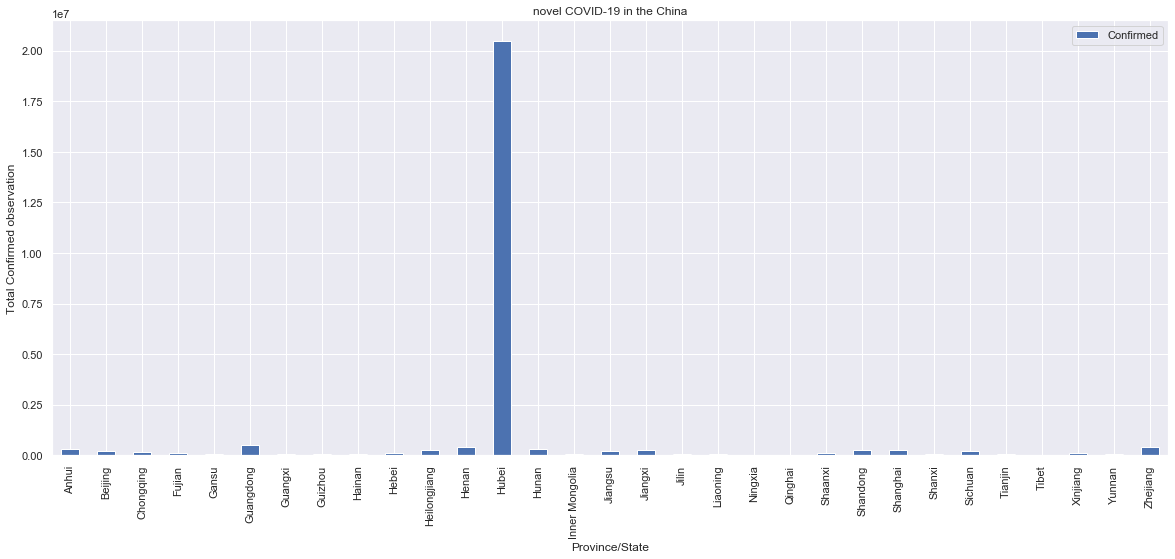

In [89]:
time_obs = china.groupby('Province/State')['Confirmed'].aggregate([np.sum])
time_obs.columns = ['Confirmed']
time_obs.plot(figsize=(20,8), title='novel COVID-19 in the China', kind='bar')
plt.ylabel('Total Confirmed observation')

1) Predict the spread of corona virus across the region for China, US and Malaysia using Linear Regression

Text(0, 0.5, '$Grownth rate$')

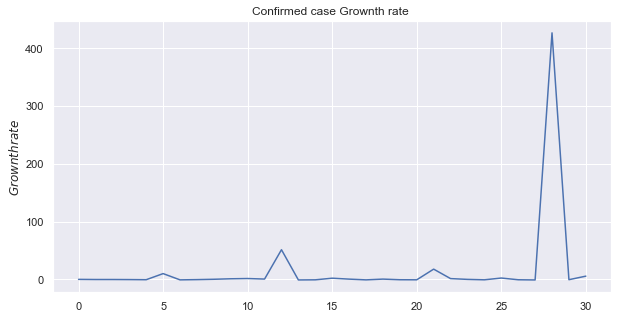

In [95]:
x = []
x.append(0)
for i in range(time_obs.shape[0]-1):
    a = time_obs.iloc[i+1,0]-time_obs.iloc[i,0]
    x.append(a/time_obs.iloc[i,0])

grown_rate = time_obs.reset_index()
grown_rate['grownRate'] = x
grown_rate.head()

grown_rate.grownRate.plot(figsize=(10,5))
plt.title('Confirmed case Grownth rate ')
plt.ylabel('$Grownth rate$')

Linear Regression
===============

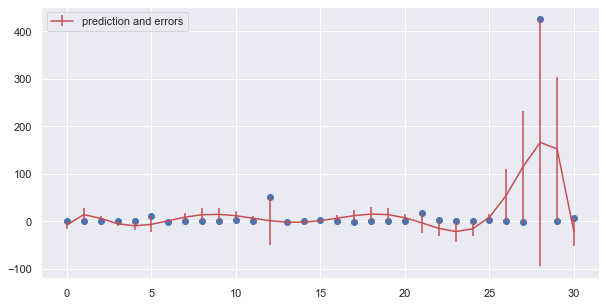

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

trend_model = make_pipeline(PolynomialFeatures(8), LinearRegression(normalize=True, fit_intercept=True))
trend_model.fit(np.array(grown_rate.index).reshape((-1,1)), grown_rate['grownRate'])

dt =np.array(grown_rate.index).reshape((-1,1)) 
fit_grown = trend_model.predict(dt)
errors = grown_rate['grownRate'] - fit_grown
upperlimits = [True, False] 
lowerlimits = [False, True] 
plt.figure(figsize=(10,5))
plt.scatter(dt, grown_rate['grownRate'])
plt.errorbar(dt, fit_grown,yerr = errors,  color='r', label='prediction and errors')
plt.legend(loc='best')
plt.show()